In [3]:
import pandas as pd
import numpy as np
import ast
import collections as c
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

In [4]:
convs=pd.read_csv('../data/bbAllFullConvosMoreAWCorrectTimeZone.csv',sep=';')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (38,39,42,43,46,47,50,51,54,55,58,59,62,63,66,67,70,71,74,75,78,79,82,83,86,87,90,91,94,95,98,99,102,103,106,107,110,111,114,115,118,119,122,123,126,127,130,131,134,135,138,139,142,143,146,147,150,151,154,155,158,159,162,163,166,167,170,171,183,188,189) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
len(convs)

5350

In [6]:
convs.allNames=convs.allNames.apply(lambda x: ast.literal_eval(x))

In [5]:
allUsers=list(set(convs.allNames.sum()))

In [6]:
len(allUsers)

2765

So 2765 unique users participated in our local conversations

In [7]:
np.savetxt('../data/bbFinalConvoUsers.txt',allUsers,fmt='%s',delimiter=',')

In [7]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [8]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [9]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [10]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [12]:
bUsers=list(set(before.allNames.sum()))

In [13]:
len(bUsers)

791

In [14]:
dUsers=list(set(during.allNames.sum()))

In [15]:
len(dUsers)

1772

In [16]:
aUsers=list(set(after.allNames.sum()))

In [17]:
len(aUsers)

1216

In [18]:
laUsers=list(set(lafter.allNames.sum()))

In [19]:
len(laUsers)

863

In [20]:
len(set(bUsers) & set(dUsers))

472

In [21]:
len(set(bUsers) & set(aUsers))

364

In [22]:
len(set(bUsers) & set(laUsers))

294

In [23]:
len(set(dUsers) & set(aUsers))

693

In [24]:
len(set(dUsers) & set(laUsers))

490

In [25]:
len(set(aUsers) & set(laUsers))

467

In [26]:
len(set(dUsers) & set(aUsers) & set(bUsers) & set(laUsers))

178

* So more than a half of before users were also active during and about hald in after
* And about 40% of during users were active after and almost 30% lafter
* Over 150 users were active in all four periods

# Patterns by users

### One-person conversations

In [27]:
len(convs[convs.userSetLen==1])/float(len(convs))

0.24990654205607477

Quarter of all conversations are users responding to themselves!!!

In [28]:
np.median(convs.convSize[convs.userSetLen==1])

2.0

In [29]:
np.percentile(convs.convSize[convs.userSetLen==1],90)

2.0

In [30]:
max(convs.convSize[convs.userSetLen==1])

12

In [31]:
convs[(convs.userSetLen==1) & (convs.convSize==12)] # add .values to see as list

,tweet0,date0,username0,text0,tweet1,date1,username1,text1,tweet2,date2,...,text43,branching,convSize,allNames,convoEndTime,convoLen,userSetLen,avgTimePerReply,longTailed,medianReplyTime
72,269602947242029056,2012-11-16 19:48:46,anthonyd1972,0,269603217615233026,2012-11-16 19:49:50,anthonyd1972,@anthonyd1972 so if the CIA talking points wer...,269603536260706304,2012-11-16 19:51:06,...,0,True,12,[anthonyd1972],2012-11-16 19:56:09,443,1,40.272727,True,81


So the vast majority of these (90%) are one reply to oneself, but there is a self-conversation of 12 steps (rant about politics)

In [11]:
np.median(convs.convoLen[convs.userSetLen==1])

234.0

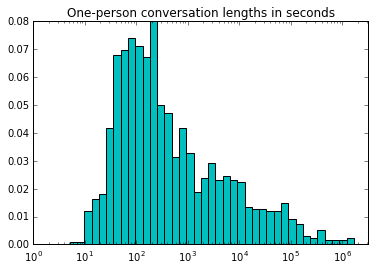

In [13]:
mConvoLen = convs.convoLen[convs.userSetLen==1].dropna().tolist()
bins=np.logspace(0, int(np.log(max(mConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(mConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('One-person conversation lengths in seconds')

In [34]:
np.median(convs.avgTimePerReply[convs.userSetLen==1])

223.0

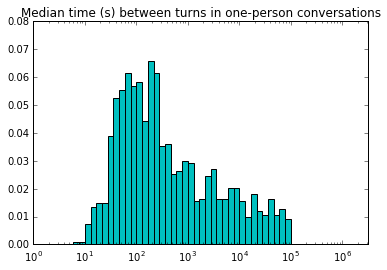

In [14]:
mMedRepTime=convs[convs.userSetLen==1].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(mMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(mMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in one-person conversations')

In [15]:
np.median(mMedRepTime)

226.0

** Takeway:**
* So the conversations users have with themselves tend to be quite a bit shorter than all the conversations
* While the number of tweets still has median of 2.0 and 90th percentile of 2 as well
* The avg and median gaps between replies in the conversation are much shorter than overall
* Pretty intuitive, since they don't have to wait for another party for a reply - no back and forth

### Two-person conversations

In [37]:
len(convs[convs.userSetLen==2])/float(len(convs))

0.7332710280373832

Almost three quarters of the conversations are with just one other person

In [38]:
np.median(convs.convSize[convs.userSetLen==2])

2.0

In [39]:
np.percentile(convs.convSize[convs.userSetLen==2],90)

4.0

In [40]:
max(convs.convSize[convs.userSetLen==2])

43

In [41]:
convs[(convs.userSetLen==2) & (convs.convSize==43)].values

array([[261901117695332352, '2012-10-26 14:44:27', 'Megglezzz', 0,
        261904642399686657, '2012-10-26 14:58:27', 'DDougyy',
        '@Megglezzz I read that as "greasy monkeys" instead of greedy. Also thought we could lose some humor with the latest news.',
        261904999309791232, '2012-10-26 14:59:52', 'Megglezzz',
        '@DDougyy greasy monkeys huh? Yeah that could work too. But this seriously makes me ashamed to call myself a fan.',
        261908598827917312, '2012-10-26 15:14:10', 'DDougyy',
        "@Megglezzz I know, right? It's kind off embarrassing.",
        261909742300053504, '2012-10-26 15:18:43', 'Megglezzz',
        '@DDougyy and they wonder why no one respects the sport',
        261911804198936578, '2012-10-26 15:26:54', 'DDougyy',
        '@Megglezzz Yep, I hear ya. :(', 261912049620246528,
        '2012-10-26 15:27:53', 'Megglezzz',
        "@DDougyy they wouldn't be allowed in the cool kids club. Nope. Lol",
        261915793703460864, '2012-10-26 15:42:46

* The median suggests that about half of these are still just one tweet and one reply - short exchanges
* The 90th percentile being 4 suggests that bigger proportion of these are longer than in one-person conversations
* The longest convo here is 43 steps - hockey and Dr. WHO, with concerns about Sandy and preparation at the end
* The 3 out of 4 two-person conversations with 12 tweets are about Sandy in some way: evacuation, prep, infrustricture failure, role of global warming

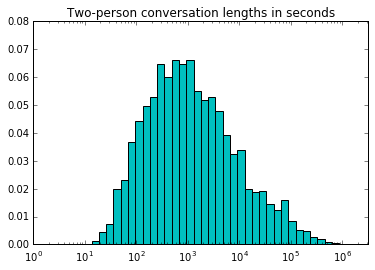

In [16]:
dConvoLen = convs.convoLen[convs.userSetLen==2].dropna().tolist()
bins=np.logspace(0, int(np.log(max(dConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Two-person conversation lengths in seconds')

In [17]:
np.median(dConvoLen)

964.0

In [44]:
np.median(convs.avgTimePerReply[convs.userSetLen==2])

592.0

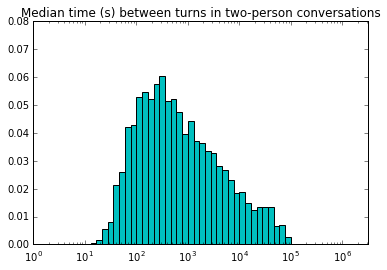

In [18]:
dMedRepTime=convs[convs.userSetLen==2].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(dMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in two-person conversations')

In [19]:
np.median(dMedRepTime)

515.0

** Takeway:**
* The two-person conversations are longer than overall (median)
* And much longer than one-person conversations
* The median number of steps is still 2, but 90th percentile is now 4 -  bigger proportion of these are longer than in one-person conversations
* In addition, the breaks between tweets are longer than overall (438s) and definitely one-person conversations
* **Difference between monolog and dialiog/ personal and social**

### More-than-two person conversations

In [48]:
len(convs[convs.userSetLen>2])/float(len(convs))

0.016822429906542057

Only **1.7%** of the conversations are with more than two people

In [49]:
np.median(convs.convSize[convs.userSetLen>2])

4.0

In [50]:
np.percentile(convs.convSize[convs.userSetLen>2],90)

6.1000000000000085

In [51]:
max(convs.convSize[convs.userSetLen>2])

11

In [52]:
convs[(convs.userSetLen>2) & (convs.convSize==11)].values

array([[264477309006925826, '2012-11-02 17:21:18', 'NYCMayorsOffice', 0,
        264477517690306562, '2012-11-02 17:22:08', 'ThomasSickler',
        '@NYCMayorsOffice THANK YOU! THANK GOD ITS CANCELED #NYCMarathon',
        264486296720916481, '2012-11-02 17:57:01', 'CG_DarkAngel',
        "@NYCMayorsOffice @MikeBloomberg Thank you for canceling NYC's marathon.  It was the right move.  #fb",
        264570354259865600, '2012-11-02 23:31:02', 'PaulyFook',
        '@NYCMayorsOffice Waiting for the Mayor to take responsibility as to why it was canceled so late. No excuses.',
        264484676402552832, '2012-11-02 17:50:35', 'emburkh',
        '@NYCMayorsOffice @NYCService maybe the runners can #volunteer instead!',
        264482738990632960, '2012-11-02 17:42:53', 'FlemingPhD',
        "@NYCMayorsOffice : Thank God.  Good decision.  We are proud of your wisdom in correcting course and focusing resources on Sandy's victims.",
        264511213189357568, '2012-11-02 19:36:02', 'Cowwgurl',

* The median length of these conversations is 4 and the 90th percentile is 6
* This suggests that these are, on average, longer conversations than overall than overall and one- and two-person convos
* The longest convo here is 12 steps - discussion of NYC marathon being cancelled

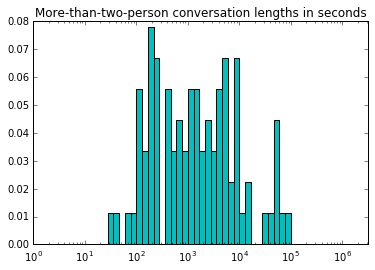

In [20]:
gConvoLen = convs.convoLen[convs.userSetLen>2].dropna().tolist()
bins=np.logspace(0, int(np.log(max(gConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(gConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('More-than-two-person conversation lengths in seconds')

In [21]:
np.median(gConvoLen)

1287.0

The number of these conversations is too small for a clear distribution at this resolution (100 bars)

In [55]:
np.median(convs.avgTimePerReply[convs.userSetLen>2])

442.39999999999998

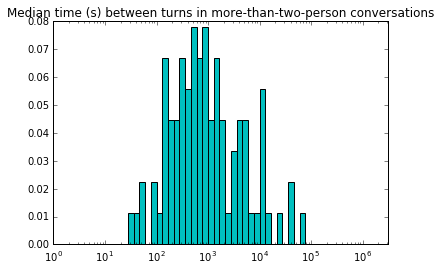

In [22]:
gMedRepTime=convs[convs.userSetLen>2].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(gMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(gMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in more-than-two-person conversations')

In [23]:
np.median(gMedRepTime)

769.75

** Takeway:**
* The more-than-two-person conversations are longer than overall (median)
* And much longer than one-person and two-person conversations
* The number of tweets in these conversations are higher than overall and others (median=4, 90th=6)
* But the breaks between tweets are the same as overall and slightly longer than two-person (**CHECK FOR SIG**)
* **As long as it's a dialog/social, more or less the same tempo of conversation is kept**

In [25]:
st.kruskal(mConvoLen,dConvoLen,gConvoLen)

KruskalResult(statistic=261.29750283610917, pvalue=1.8195675857383543e-57)

In [28]:
st.kruskal(mMedRepTime,dMedRepTime,gMedRepTime)

KruskalResult(statistic=116.87280803001639, pvalue=4.1820786299945741e-26)

In [29]:
import Dunn

In [30]:
Dunn.kw_dunn([mConvoLen,dConvoLen,gConvoLen], [(0,1),(0,2)], alpha=0.05, method='hs')

/home/mako0970/ReplyPaperNew/code/Dunn.py:106: UserWarning: We see ties.
  warnings.warn("We see ties.")


(261.29750283610917,
 1.8195675857383543e-57,
 array([ 16.02341825,   5.55695198]),
 array([  0.00000000e+00,   2.74526248e-08]),
 array([ True,  True], dtype=bool))

In [31]:
Dunn.kw_dunn([mMedRepTime,dMedRepTime,gMedRepTime], [(0,1),(0,2)], alpha=0.05, method='hs')

/home/mako0970/ReplyPaperNew/code/Dunn.py:106: UserWarning: We see ties.
  warnings.warn("We see ties.")


(116.87280803001639,
 4.1820786299945741e-26,
 array([ 10.47982664,   4.86408305]),
 array([  0.00000000e+00,   1.14988626e-06]),
 array([ True,  True], dtype=bool))

# Conversation types (# users) across time stages

In [66]:
len(before)/float(len(before)+len(during)+len(after)+len(lafter))

0.15584169664836206

In [67]:
len(during)/float(len(before)+len(during)+len(after)+len(lafter))

0.39954554061730735

In [68]:
len(after)/float(len(before)+len(during)+len(after)+len(lafter))

0.2685097519409203

In [69]:
len(lafter)/float(len(before)+len(during)+len(after)+len(lafter))

0.17610301079341034

**Summary**
* 16% of conversations happen Before
* 40% During
* 27% After
* and 18% Long After
Check if these percentages hold for different types of conversations or if they over/underrepresented in certain periods

### Frequency of one-person convos across periods

In [70]:
len(before[before.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.18773373223635004

In [71]:
len(during[during.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.30740463724756917

In [72]:
len(after[after.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.29020194465220644

In [73]:
len(lafter[lafter.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.19596110695587135

In [74]:
len(before[before.userSetLen==1])/float(len(before))

0.30498177399756987

In [75]:
len(during[during.userSetLen==1])/float(len(during))

0.19478672985781992

In [76]:
len(after[after.userSetLen==1])/float(len(after))

0.2736248236953456

In [77]:
len(lafter[lafter.userSetLen==1])/float(len(lafter))

0.2817204301075269

**Takeaway:**
* One-person conversations seem to be underrepresented (sligtly) During
* They are a bit overrepresented everywhere else
* CHECK CHI-SQUARE

### Frequency of two-person convos across periods

In [78]:
len(before[before.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.14427733877134846

In [79]:
len(during[during.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.4198317614070864

In [80]:
len(after[after.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.2574560285495794

In [81]:
len(lafter[lafter.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.16772877899566657

In [82]:
len(before[before.userSetLen==2])/float(len(before))

0.6877278250303767

In [83]:
len(during[during.userSetLen==2])/float(len(during))

0.7805687203791469

In [84]:
len(after[after.userSetLen==2])/float(len(after))

0.7122708039492243

In [85]:
len(lafter[lafter.userSetLen==2])/float(len(lafter))

0.7075268817204301

**Takeaway:**
* The two-person conversations seem to be under-represented in After
* And a tiny bit underrepresented in Before and Long After
* And a tiny bit overrepresented in During
* CHECK CHI-SQUARE

### Frequency of more-than-two-person convos across periods

In [86]:
len(before[before.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.06666666666666667

In [87]:
len(during[during.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.5777777777777777

In [88]:
len(after[after.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.2222222222222222

In [89]:
len(lafter[lafter.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.1111111111111111

In [90]:
len(before[before.userSetLen>2])/float(len(before))

0.007290400972053463

In [91]:
len(during[during.userSetLen>2])/float(len(during))

0.024644549763033177

In [92]:
len(after[after.userSetLen>2])/float(len(after))

0.014104372355430184

In [93]:
len(lafter[lafter.userSetLen>2])/float(len(lafter))

0.010752688172043012

**Takeway:**
* While there are only 88 more-than-two-person conversations altogether
* It seems that they are highly concentrated in the During period
* About 58% of them are in this period
* Every other period has these underrepresented, but especially Before
* CHECK CHI-SQUARE

### CHI-Square for conversation types and Periods

In [32]:
N=float(len(before)+len(during)+len(after)+len(lafter))

In [12]:
b_count=len(before)

In [13]:
d_count=len(during)

In [14]:
a_count=len(after)

In [15]:
la_count=len(lafter)

Have to add up periods isntead of conv, b/s 69 conversations falll through - mess up counts

In [17]:
mono_count=len(before[before.userSetLen==1])+len(during[during.userSetLen==1])+len(after[after.userSetLen==1])+len(lafter[lafter.userSetLen==1])

In [18]:
dio_count=len(before[before.userSetLen==2])+len(during[during.userSetLen==2])+len(after[after.userSetLen==2])+len(lafter[lafter.userSetLen==2])

In [19]:
group_count=len(before[before.userSetLen>2])+len(during[during.userSetLen>2])+len(after[after.userSetLen>2])+len(lafter[lafter.userSetLen>2])

#### Intersections

In [20]:
b_mono=len(before[before.userSetLen==1])

In [21]:
d_mono=len(during[during.userSetLen==1])

In [22]:
a_mono=len(after[after.userSetLen==1])

In [23]:
la_mono=len(lafter[lafter.userSetLen==1])

In [24]:
b_dio=len(before[before.userSetLen==2])

In [25]:
d_dio=len(during[during.userSetLen==2])

In [26]:
a_dio=len(after[after.userSetLen==2])

In [27]:
la_dio=len(lafter[lafter.userSetLen==2])

In [28]:
b_group=len(before[before.userSetLen>2])

In [29]:
d_group=len(during[during.userSetLen>2])

In [30]:
a_group=len(after[after.userSetLen>2])

In [31]:
la_group=len(lafter[lafter.userSetLen>2])

#### Expected Counts

In [42]:
exp_b_mono=(b_count*mono_count)/N

In [43]:
exp_d_mono=(d_count*mono_count)/N

In [44]:
exp_a_mono=(a_count*mono_count)/N

In [45]:
exp_la_mono=(la_count*mono_count)/N

In [46]:
exp_b_dio=(b_count*dio_count)/N

In [47]:
exp_d_dio=(d_count*dio_count)/N

In [48]:
exp_a_dio=(a_count*dio_count)/N

In [49]:
exp_la_dio=(la_count*dio_count)/N

In [50]:
exp_b_group=(b_count*group_count)/N

In [51]:
exp_d_group=(d_count*group_count)/N

In [52]:
exp_a_group=(a_count*group_count)/N

In [53]:
exp_la_group=(la_count*group_count)/N

#### Set up test

In [54]:
obs=[b_mono,d_mono,a_mono,la_mono,b_dio,d_dio,a_dio,la_dio,b_group,d_group,a_group,la_group]

In [55]:
exp=[exp_b_mono,exp_d_mono,exp_a_mono,exp_la_mono,exp_b_dio,exp_d_dio,exp_a_dio,exp_la_dio,exp_b_group,exp_d_group,exp_a_group,exp_la_group]

In [56]:
st.chisquare(obs, f_exp=exp)

(68.134046172645697, 2.7604395004446399e-10)

## Analysis by User features

Supplement the data with other user-level information from the data frame

In [7]:
sup=pd.read_csv('../data/bbContextOntopicRepliesBothSidesDF.csv',sep=';')

In [95]:
sup.columns

Index([u'id', u'username', u'user_id', u'geo_enabled', u'followCount',
       u'friendCount', u'faveCount', u'tweetCount', u'date', u'timing',
       u'coordinates', u'location', u'source', u'retweetCount', u'isRetweet',
       u'origTweet', u'origUser', u'origTime', u'origPlace',
       u'origUserCreated', u'contributors', u'hashtags', u'has_media', u'urls',
       u'mentions', u'replyWho', u'replyWhat', u'text', u'date_obj'],
      dtype='object')

* The biggest number of users in a single convo is 11 - replies to Bloomberg cancelling the marathon
* The next largest number of users in a conversation is 5 - start there

In [96]:
#make new columns for the unique conversation participants (up to 5)
for i in xrange(5):
    userCol='convoUser'+str(i)
    convs[userCol]=convs.allNames.apply(lambda x: x[i] if len(x)>i else 0)

Imprtant aside:
* People's friends and follower's nerwork change
* They also change size over the time periods we are studying
* For this purpose of classifying conversations by users, we can pick the earliest
* To signify what kind of user they were going into the event
* Later we can also look at users whose follower and other counts changed dramatically
* It's hard to trust this data as it seems to fluctuate back and forth pretty randomly
* There seem to be **glitches** in the counts around the time of the event - most of them come back to normal afterwards

In [ ]:
for i in xrange(5):
    userCol='convoUser'+str(i)
    followCol='followersUser'+str(i)
    friendCol='friendsUser'+str(i)
    faveCol='favesUser'+str(i)
    tweetCount='tweetCountUser'+str(i)
    convs[followCol]=0
    convs[friendCol]=0
    convs[faveCol]=0
    convs[tweetCount]=0
    #temp=pd.merge(left=convs, right=sup[['username','followCount','friendCount','faveCount','tweetCount']],how='left', left_on=userCol, right_on='username')
    #convs[[followCol,friendCol,faveCol,tweetCount]]=temp[['followCount','friendCount','faveCount','tweetCount']]
    #MERGING is NOT WORKING HERE
    for index, row in convs.iterrows():
        t=sup.followCount[sup.username==row[userCol]].unique()
        if len(t)>0:
            convs.loc[index,followCol]=t[0]
        else:
            convs.loc[index,followCol]=np.nan
        
        t=sup.friendCount[sup.username==row[userCol]].unique()
        if len(t)>0:
            convs.loc[index,friendCol]=t[0]
        else:
            convs.loc[index,friendCol]=np.nan
        
        t=sup.faveCount[sup.username==row[userCol]].unique()
        if len(t)>0:
            convs.loc[index,faveCol]=t[0]
        else:
            convs.loc[index,faveCol]=np.nan
        
        t=sup.tweetCount[sup.username==row[userCol]].unique()
        if len(t)>0:
            convs.loc[index,tweetCount]=t[0]
        else:
            convs.loc[index,tweetCount]=np.nan

* This was taking too long so I did overnight in python
* Instead just read in the dataframe that now includes these fields

In [8]:
convs=pd.read_csv('../data/bbAllFullConvosMoreAWCorrectTimeZone.csv',sep=';')

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (38,39,42,43,46,47,50,51,54,55,58,59,62,63,66,67,70,71,74,75,78,79,82,83,86,87,90,91,94,95,98,99,102,103,106,107,110,111,114,115,118,119,122,123,126,127,130,131,134,135,138,139,142,143,146,147,150,151,154,155,158,159,162,163,166,167,170,171,183,188,189) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
len(convs)

5350

### By Follower Count

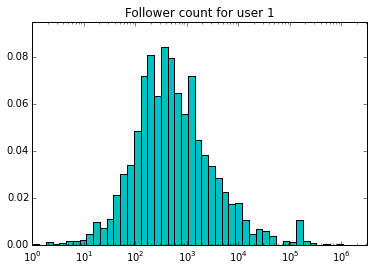

In [99]:
user0FollowCount=convs.followersUser0.dropna().tolist()
bins=np.logspace(0, int(np.log(max(user0FollowCount))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(user0FollowCount,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.095)
plt.title('Follower count for user 1')

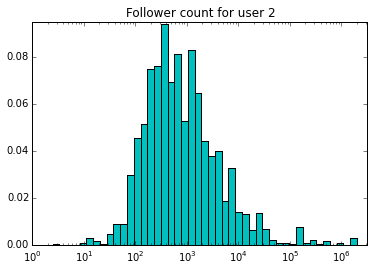

In [100]:
user1FollowCount=convs.followersUser1.dropna().tolist()
bins=np.logspace(0, int(np.log(max(user0FollowCount))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(user1FollowCount,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.095)
plt.title('Follower count for user 2')

* too sparse after user2
* most conversations have 1 or 2 users

In [101]:
np.median(convs.followersUser0.dropna())

450.0

In [102]:
np.median(convs.followersUser1.dropna())

649.0

In [103]:
np.median(convs.followersUser0.dropna().append(convs.followersUser1.dropna()))

525.5

In [104]:
convs['highFollowUser0']=convs.followersUser0.apply(lambda x: 1 if x>500 else 0)

In [105]:
sum(convs.highFollowUser0)

2532

In [106]:
convs['highFollowUser1']=convs.followersUser1.apply(lambda x: 1 if x>500 else 0)

In [107]:
sum(convs.highFollowUser1)

2237

In [108]:
convs['highFollowUser2']=convs.followersUser2.apply(lambda x: 1 if x>500 else 0)

In [109]:
sum(convs.highFollowUser2)

51

In [110]:
convs['highFollowUser3']=convs.followersUser3.apply(lambda x: 1 if x>500 else 0)

In [111]:
sum(convs.highFollowUser3)

10

In [112]:
convs['allHighFollowUsers']=convs.highFollowUser0+convs.highFollowUser1+convs.highFollowUser2+convs.highFollowUser3

In [113]:
min(convs.allHighFollowUsers)

0

In [114]:
max(convs.allHighFollowUsers)

4

In [115]:
len(convs[convs.allHighFollowUsers==0])

2062

In [116]:
len(convs[convs.allHighFollowUsers==1])

1774

In [117]:
len(convs[convs.allHighFollowUsers==2])

1488

In [118]:
len(convs[convs.allHighFollowUsers==3])

24

In [119]:
len(convs[convs.allHighFollowUsers==4])

2

In [121]:
2062+1774+1488+24+2

5350

**Group them as such:**
* No high follower users
* One high-follower user
* Two or more high-follower users

In [11]:
NoHighFollow=convs[convs.allHighFollowUsers==0]

In [123]:
OneHighFollow=convs[convs.allHighFollowUsers==1]

In [124]:
ManyHighFollow=convs[convs.allHighFollowUsers>1]

In [125]:
len(NoHighFollow[NoHighFollow.userSetLen==1])/float(len(NoHighFollow))

0.4980601357904947

In [126]:
len(NoHighFollow[NoHighFollow.userSetLen==2])/float(len(NoHighFollow))

0.498545101842871

In [127]:
len(NoHighFollow[NoHighFollow.userSetLen>2])/float(len(NoHighFollow))

0.0033947623666343357

In [128]:
len(NoHighFollow[NoHighFollow.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.7681376215407629

In [129]:
len(NoHighFollow[NoHighFollow.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.26204435381085905

In [130]:
len(NoHighFollow[NoHighFollow.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.07777777777777778

**Takeway:**
* Conversation with no high-follower users are much more often (50%) one-person conversations than overall (25%)
* And they underrepresent the two-person conversations (50%) compared to overall (73%)

In [12]:
AnyHighFollow=convs[convs.allHighFollowUsers>0]

In [132]:
len(AnyHighFollow[AnyHighFollow.userSetLen==1])/float(len(AnyHighFollow))

0.09428223844282238

In [133]:
len(AnyHighFollow[AnyHighFollow.userSetLen==2])/float(len(AnyHighFollow))

0.8804744525547445

In [134]:
len(AnyHighFollow[AnyHighFollow.userSetLen>2])/float(len(AnyHighFollow))

0.02524330900243309

In [135]:
len(AnyHighFollow[AnyHighFollow.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.2318623784592371

In [136]:
len(AnyHighFollow[AnyHighFollow.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.737955646189141

In [137]:
len(AnyHighFollow[AnyHighFollow.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.9222222222222223

#### CHI-Square

In [13]:
pop_mono=len(AnyHighFollow[AnyHighFollow.userSetLen==1])

In [14]:
pop_dia=len(AnyHighFollow[AnyHighFollow.userSetLen==2])

In [15]:
pop_group=len(AnyHighFollow[AnyHighFollow.userSetLen>2])

In [16]:
nonpop_mono=len(NoHighFollow[NoHighFollow.userSetLen==1])

In [17]:
nonpop_dia=len(NoHighFollow[NoHighFollow.userSetLen==2])

In [18]:
nonpop_group=len(NoHighFollow[NoHighFollow.userSetLen>2])

In [19]:
obs=[pop_mono, pop_dia,pop_group,nonpop_mono, nonpop_dia, nonpop_group]

In [20]:
N=float(len(convs))

In [21]:
exp_pop_mono=len(AnyHighFollow)*len(convs[convs.userSetLen==1])/N

In [22]:
exp_pop_dia=len(AnyHighFollow)*len(convs[convs.userSetLen==2])/N

In [23]:
exp_pop_group=len(AnyHighFollow)*len(convs[convs.userSetLen>2])/N

In [24]:
exp_nonpop_mono=len(NoHighFollow)*len(convs[convs.userSetLen==1])/N

In [25]:
exp_nonpop_dia=len(NoHighFollow)*len(convs[convs.userSetLen==2])/N

In [26]:
exp_nonpop_group=len(NoHighFollow)*len(convs[convs.userSetLen>2])/N

In [27]:
exp=[exp_pop_mono, exp_pop_dia,exp_pop_group,exp_nonpop_mono, exp_nonpop_dia, exp_nonpop_group]

In [28]:
st.chisquare(obs, f_exp=exp)

(1114.8074932633392, 8.3064499620028744e-239)

### Conversation size, duration, and speed for 2 types of high-follower participation

#### None

In [138]:
np.median(NoHighFollow.convSize)

2.0

In [139]:
np.percentile(NoHighFollow.convSize,90)

4.0

In [140]:
np.median(NoHighFollow.convoLen)

507.0

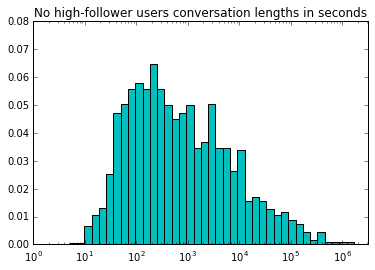

In [14]:
nonpopConvoLen = NoHighFollow.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(nonpopConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(nonpopConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('No high-follower users conversation lengths in seconds')

In [15]:
np.median(nonpopConvoLen)

507.0

In [142]:
np.median(NoHighFollow.avgTimePerReply)

365.75

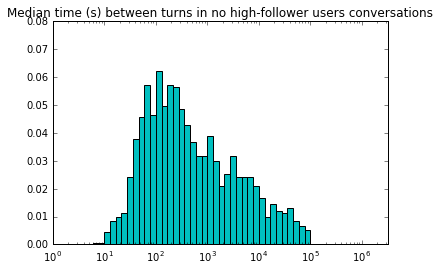

In [20]:
nonpopMedRepTime=NoHighFollow.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(nonpopMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(nonpopMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in no high-follower users conversations')

In [21]:
np.median(nonpopMedRepTime)

321.0

#### Any

In [144]:
np.median(AnyHighFollow.convSize)

2.0

In [145]:
np.percentile(AnyHighFollow.convSize,90)

4.0

In [146]:
np.median(AnyHighFollow.convoLen)

856.0

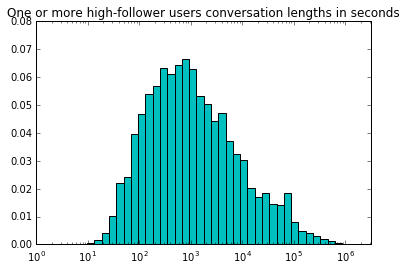

In [18]:
popConvoLen = AnyHighFollow.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(popConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(popConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('One or more high-follower users conversation lengths in seconds')

In [148]:
np.median(AnyHighFollow.avgTimePerReply)

551.16666666650008

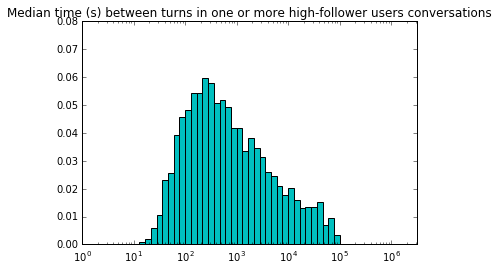

In [22]:
popMedRepTime=AnyHighFollow.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(popMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(popMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in one or more high-follower users conversations')

In [23]:
np.median(popMedRepTime)

513.5

In [19]:
st.mannwhitneyu(popConvoLen,nonpopConvoLen)

MannwhitneyuResult(statistic=2948800.0, pvalue=5.1670638384574585e-16)

In [24]:
st.mannwhitneyu(popMedRepTime, nonpopMedRepTime)

MannwhitneyuResult(statistic=2989562.5, pvalue=2.0230236029862175e-13)

**High-Followers Takeway:**
* Conversations with one or more high-follower users are less frequently one-person conversation
* And more frequently than overall the two-person conversations
* The not high-follower users much more frequently engage in self-conversation
* The one or more high-follower users conversation are quite a bit longer (seconds) then those with no high-follower users
* Meanwhile both types have the same general distribution of steps in the conversation (med=2, 90%=4)
* This means, and is valided by avd and median inter-reply time, which on average (median) is longer in the conversations with some high-follower users
* The non distributions for convoLen and medInterReplyTime are more humpy, with clearer work sessions lognormals, whereas the some distributions are more smooth and long-tailed
* Does this mean that high-follower users slow down the movement of the conversation because the timing of their reply depends less on the timing of the original than on their own tweeting work practices 

### Are high-followers responsible for slowing down the conversation during?

In [151]:
len(NoHighFollow)/float(len(convs))

0.38542056074766357

In [152]:
len(AnyHighFollow)/float(len(convs))

0.6145794392523365

In [25]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [26]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [27]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [28]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [16]:
len(before[before.allHighFollowUsers>0])/float(len(before))

0.5528554070473876

In [22]:
len(during[during.allHighFollowUsers>0])/float(len(during))

0.6502369668246446

In [19]:
len(after[after.allHighFollowUsers>0])/float(len(after))

0.6191819464033851

In [25]:
len(lafter[lafter.allHighFollowUsers>0])/float(len(lafter))

0.5827956989247312

** SO YES!:**
* There is a higher percentge of conversations with one or more high-follower users During and to slightly leser degree After
* As compared to Before and Long After
* So it seems that the higher presence of high-followers (like celebs and officials) slows down the conversation During
* DO CHI-SQUARE
* In the future, we can test all this with temporal network models that include follower information as node attributes

In [29]:
len(before[before.allHighFollowUsers>0])

455

In [30]:
len(before[before.allHighFollowUsers==0])

368

len(during[during.allHighFollowUsers>0])

In [32]:
len(during[during.allHighFollowUsers==0])

738

In [33]:
len(after[after.allHighFollowUsers>0])

878

In [34]:
len(after[after.allHighFollowUsers==0])

540

In [35]:
len(lafter[lafter.allHighFollowUsers>0])

542

In [36]:
len(lafter[lafter.allHighFollowUsers==0])

388

<img src="../data/ChiSqPeriodsVsPopular.png" width=500>

In [161]:
st.ranksums(NoHighFollow.convoLen, AnyHighFollow.convoLen)

(-8.0228290344050972, 1.0333713034239613e-15)

In [162]:
st.ranksums(NoHighFollow.medianReplyTime, AnyHighFollow.medianReplyTime)

(-7.2216791858802667, 5.1349501175538168e-13)

### By Frequent Conversationalists

In [163]:
strongTieUsers=np.loadtxt('../data/strongTieUsers.txt', dtype=str, delimiter=',')

In [164]:
len(strongTieUsers)

949

In [165]:
convs['strongTiesUser0']=convs.convoUser0.apply(lambda x: 1 if x in strongTieUsers else 0)

In [166]:
convs['strongTiesUser1']=convs.convoUser1.apply(lambda x: 1 if x in strongTieUsers else 0)

In [167]:
convs['strongTiesUser2']=convs.convoUser2.apply(lambda x: 1 if x in strongTieUsers else 0)

In [168]:
convs['strongTiesUser3']=convs.convoUser3.apply(lambda x: 1 if x in strongTieUsers else 0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


In [169]:
convs['strongTiesAllUsers']=convs.strongTiesUser0+convs.strongTiesUser1+convs.strongTiesUser2+convs.strongTiesUser3

In [170]:
max(convs.strongTiesAllUsers)

4

In [171]:
len(convs[convs.strongTiesAllUsers==0])

1532

In [172]:
len(convs[convs.strongTiesAllUsers==1])

1544

In [173]:
len(convs[convs.strongTiesAllUsers==2])

2235

In [174]:
len(convs[convs.strongTiesAllUsers==3])

37

In [175]:
len(convs[convs.strongTiesAllUsers==4])

2

In [176]:
Out[171]+Out[172]+Out[173]+Out[174]+Out[175]

5350

**Group them as such:**
* No strong tie users
* One strong tie user
* Two strong tie users

In [177]:
len(convs[convs.strongTiesAllUsers==0])/float(len(convs))

0.2863551401869159

In [178]:
len(convs[convs.strongTiesAllUsers==1])/float(len(convs))

0.2885981308411215

In [179]:
len(convs[convs.strongTiesAllUsers>1])/float(len(convs))

0.4250467289719626

**FINDING:**
* Two strong tie user conversations are much more common than say one
* This makes sense - the measure looks for people who reply and are replied to frequently (both sides)
* So it takes two people
* In the future could look specifically for strong tier pairs: by finding high weight high reciprocity edges and see what conversation userSets contain those pairs

In [180]:
noStrongTies=convs[convs.strongTiesAllUsers==0]

In [181]:
oneStrongTies=convs[convs.strongTiesAllUsers==1]

In [182]:
manyStrongTies=convs[convs.strongTiesAllUsers>1]

In [183]:
len(noStrongTies[noStrongTies.userSetLen==1])/float(len(noStrongTies))

0.33550913838120106

In [184]:
len(noStrongTies[noStrongTies.userSetLen==2])/float(len(noStrongTies))

0.6527415143603134

In [185]:
len(noStrongTies[noStrongTies.userSetLen>2])/float(len(noStrongTies))

0.01174934725848564

**Takeway:**
* Conversation with no strong-tie users are much more often (33%) one-person conversations than overall (25%)
* And they underrepresent the two-person conversations (64%) compared to overall (73%)

In [186]:
len(oneStrongTies[oneStrongTies.userSetLen==1])/float(len(oneStrongTies))

0.5330310880829016

In [187]:
len(oneStrongTies[oneStrongTies.userSetLen==2])/float(len(oneStrongTies))

0.4572538860103627

In [188]:
len(oneStrongTies[oneStrongTies.userSetLen>2])/float(len(oneStrongTies))

0.009715025906735751

**Takeway:**
* Conversation with one strong-tie user are more often (53%) one-person conversations than overall (25%)
* But they underrepresent the two-person conversations (45%) compared to overall (73%)
* Since the none and one strong tie convesations show the same trend, should I combine them?

In [189]:
len(manyStrongTies[manyStrongTies.userSetLen==1])/float(len(manyStrongTies))

0.0

In [190]:
len(manyStrongTies[manyStrongTies.userSetLen==2])/float(len(manyStrongTies))

0.974934036939314

In [191]:
len(manyStrongTies[manyStrongTies.userSetLen>2])/float(len(manyStrongTies))

0.025065963060686015

In [192]:
len(manyStrongTies[manyStrongTies.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.0

In [193]:
len(manyStrongTies[manyStrongTies.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.5651287280142748

In [194]:
len(manyStrongTies[manyStrongTies.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.6333333333333333

**Takeway:**
* Conversation with one or more strong-tie user are never one-person conversations - obviously
* But they are 98% of the time two-person conversations

In [195]:
fewStrongTies=convs[convs.strongTiesAllUsers<2]

In [196]:
len(fewStrongTies[fewStrongTies.userSetLen==1])/float(len(fewStrongTies))

0.4346553966189857

In [197]:
len(fewStrongTies[fewStrongTies.userSetLen==2])/float(len(fewStrongTies))

0.5546163849154746

In [198]:
len(fewStrongTies[fewStrongTies.userSetLen>2])/float(len(fewStrongTies))

0.010728218465539662

In [199]:
len(fewStrongTies[fewStrongTies.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

1.0

In [200]:
len(fewStrongTies[fewStrongTies.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.4348712719857252

In [201]:
len(fewStrongTies[fewStrongTies.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.36666666666666664

### Conversation size, duration, and speed for 2 types of strong-tie participation

#### Few (0 or 1)

In [202]:
np.median(fewStrongTies.convSize)

2.0

In [203]:
np.percentile(fewStrongTies.convSize,90)

3.0

In [204]:
np.median(fewStrongTies.convoLen)

505.0

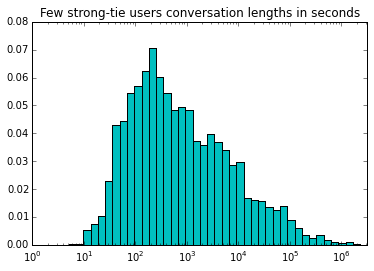

In [205]:
convoLen = fewStrongTies.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Few strong-tie users conversation lengths in seconds')

In [206]:
np.median(fewStrongTies.avgTimePerReply)

437.0

In [207]:
np.median(fewStrongTies.medianReplyTime)

436.5

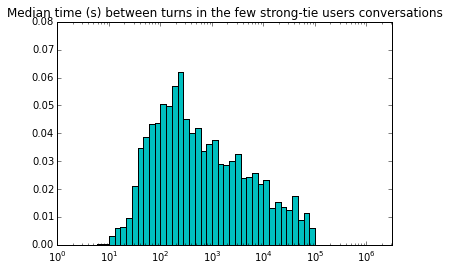

In [208]:
medRepTime=fewStrongTies.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in the few strong-tie users conversations')

#### Many (2 and up)

In [209]:
np.median(manyStrongTies.convSize)

3.0

In [210]:
np.percentile(manyStrongTies.convSize,90)

5.0

In [211]:
np.median(manyStrongTies.convoLen)

1044.5

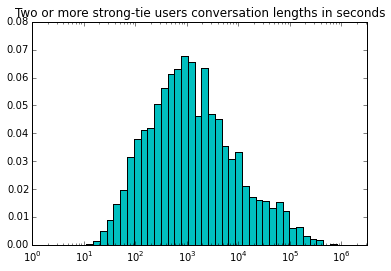

In [212]:
convoLen = manyStrongTies.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Two or more strong-tie users conversation lengths in seconds')

In [213]:
np.median(manyStrongTies.avgTimePerReply)

541.5

In [215]:
np.median(manyStrongTies.medianReplyTime.dropna())

451.0

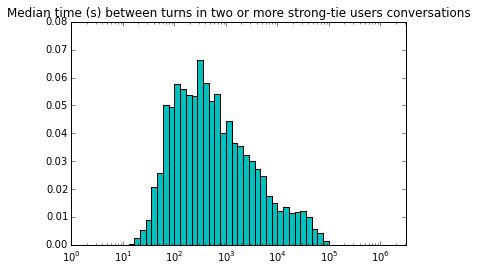

In [216]:
medRepTime=manyStrongTies.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in two or more strong-tie users conversations')

**Strong-Tie Takeway:**
* Conversations with one or less strong-tie users are more frequently one-person conversation (43% vs 25% overall)
* And less frequently than overall the two-person conversations (56% vs 73% overall)
* The two or more strong-tie users conversation have more steps then those with few strong-tie users (med=3, 90%=5)
* Meanwhile, the avg and median inter-reply time for many strong-tie conversations, are on average (median) similar to the few strong-tie conversations
* But this produces longer conversations in the many strong-ties case
* So the strong-tie pairs produce longer conversations because their conversations have more exchages, while the pace is more or less the same
* inter-reply time distribution for few strong-tie conversations is more smooth than for many with less pronounced work session peaks - reply timing depends more on thier own tweeting patterns than on the timing of the original 
* In the conversations with two or more strong-tie people, there are clear work session peaks - users have 3-4 practices of replying to their conversation partners

### Do strong-tie users lengthen the conversations during and long after?

In [217]:
len(fewStrongTies)/float(len(convs))

0.5749532710280374

In [218]:
len(manyStrongTies)/float(len(convs))

0.4250467289719626

In [219]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [220]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [221]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [222]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [223]:
len(before[before.strongTiesAllUsers>1])/float(len(before))

0.4264884568651276

In [224]:
len(during[during.strongTiesAllUsers>1])/float(len(during))

0.3995260663507109

In [225]:
len(after[after.strongTiesAllUsers>1])/float(len(after))

0.4400564174894217

In [226]:
len(lafter[lafter.strongTiesAllUsers>1])/float(len(lafter))

0.4612903225806452

** NO!:**
* No strong difference across time periods
* LOOK INTO THIS - cause if they are not more frequent During
* What makes convos longer during (if that's in fact true - confused now)

In [227]:
st.ranksums(fewStrongTies.convoLen, manyStrongTies.convoLen)

(-10.219550953328977, 1.6208999141306634e-24)

In [228]:
st.ranksums(fewStrongTies.medianReplyTime, manyStrongTies.medianReplyTime)

(-0.31566377579684535, 0.75225772457129025)

In [229]:
convs.to_csv('../data/bbAllFullConvosMoreAWCorrectTimeZone.csv',sep=';',index=False)